<span style="font-family: Arial; font-size: 18pt; display: block;text-align: center;">**Predictive Modeling of Medical Costs for Hospital Resource Allocation**</span>
<span style="font-family: Arial; font-size: 12pt; display: block;text-align: center;">**Murshida Meethale Purayil , Entri Elevate, 12-May-2024**</span>

<span style="font-family: Arial; font-size: 14pt;">**Introduction:** </span>

<span style="font-family: Arial; font-size: 10pt;">In the modern healthcare landscape, optimizing resource allocation while ensuring quality patient care is crucial for healthcare providers. Hospital ABC aims to enhance its resource allocation and patient support services by understanding the factors influencing medical costs. This project utilizes a comprehensive dataset containing demographic, lifestyle, health status, and other relevant information to predict medical costs for individual patients. By accurately estimating medical expenses, Hospital ABC can allocate resources effectively and improve healthcare planning, ultimately enhancing patient outcomes.</span>

<span style="font-family: Arial; font-size: 14pt;">**Problem Statement:** </span>

<span style="font-family: Arial; font-size: 10pt;">Hospital ABC faces the challenge of understanding the complex interplay of demographic factors, lifestyle choices, health status, insurance plan types, and other variables that influence medical costs. Developing a predictive model to estimate these costs based on patient characteristics will enable Hospital ABC to optimize resource allocation and enhance patient support services. </span>

<span style="font-family: Arial; font-size: 14pt;">**Objectives:** </span>

<span style="font-family: Arial; font-size: 10pt;">-Explore the relationship between demographic factors, lifestyle-related information, health status, insurance plan type, and medical costs.

-Develop a predictive model to estimate medical costs for individual patients.

-Evaluate the performance of the predictive model using appropriate metrics.

-Provide actionable insights for Hospital ABC to optimize resource allocation and enhance healthcare planning.
 </span>

<span style="font-family: Arial; font-size: 14pt;">**Data Collection:** </span>

In [194]:
pip install openpyxl numpy pandas matplotlib seaborn scikit-learn 

In [195]:
#Importing necessary libraries

In [196]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns



In [197]:
MedicalData = pd.read_excel("medical_data.xlsx")
MedicalData.head(10)

,Age,Sex,BMI,Children,Smoker,Region,Occupation,Exercise_Frequency,Chronic_Conditions,Insurance_Plan_Type,...,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine,Emergency_Room_Visits,Healthcare_Utilization,Charges
0,56.0,Male,26.78763,0.0,No,East,White Collar,Daily,2.0,Gold,...,Difficult,Weak,Good,Present,High,Yes,Unavailable,4.0,975.5380,84.78763
1,69.0,Male,22.06365,4.0,Yes,West,White Collar,Monthly,2.0,Bronze,...,Difficult,Weak,Good,Absent,High,Yes,Available,2.0,1047.9770,92.06365
2,46.0,Female,24.03610,2.0,Yes,East,White Collar,Rarely,1.0,Silver,...,Difficult,Strong,Good,Absent,Low,No,Unavailable,2.0,836.3854,71.03610
3,32.0,Male,24.22982,2.0,No,North,Blue Collar,Rarely,2.0,Gold,...,NaN,Strong,Good,NaN,Low,No,Available,0.0,927.0653,58.22982
4,60.0,Male,31.78428,0.0,NaN,East,Blue Collar,Weekly,0.0,Silver,...,Easy,Weak,Poor,Present,Low,Yes,Available,2.0,1260.7970,91.78428
5,25.0,Female,23.20281,4.0,No,West,Other,NaN,1.0,Silver,...,Difficult,Weak,Poor,Absent,Low,No,Unavailable,4.0,766.4376,50.20281
6,78.0,Male,31.78317,2.0,No,South,White Collar,NaN,0.0,Silver,...,Difficult,Weak,Poor,Present,NaN,No,Unavailable,2.0,NaN,111.78320
7,38.0,Male,11.43755,2.0,No,West,Blue Collar,Weekly,2.0,Silver,...,Difficult,Strong,Good,Present,High,NaN,Available,1.0,598.9160,51.43755
8,56.0,Male,31.73928,2.0,Yes,East,White Collar,Monthly,0.0,NaN,...,Easy,Strong,Poor,Present,Low,No,Unavailable,3.0,1364.6560,88.73928
9,75.0,Male,NaN,4.0,Yes,East,Blue Collar,Weekly,2.0,Silver,...,Difficult,Weak,Poor,Present,Low,Yes,Available,3.0,1131.6310,NaN


In [198]:
print (MedicalData.shape)

(1000, 35)


In [199]:
print (MedicalData.columns)

Index(['Age', 'Sex', 'BMI', 'Children', 'Smoker', 'Region', 'Occupation',
       'Exercise_Frequency', 'Chronic_Conditions', 'Insurance_Plan_Type',
       'Marital_Status', 'Distance_to_Nearest_Hospital', 'Income_Level',
       'Family_Medical_History', 'Primary_Care_Physician_Visits',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine',
       'Emergency_Room_Visits', 'Healthcare_Utilization', 'Charges'],
      dtype='object')


In [200]:
print (MedicalData.info)

<bound method DataFrame.info of       Age     Sex       BMI  Children Smoker Region    Occupation  \
0    56.0    Male  26.78763       0.0     No   East  White Collar   
1    69.0    Male  22.06365       4.0    Yes   West  White Collar   
2    46.0  Female  24.03610       2.0    Yes   East  White Collar   
3    32.0    Male  24.22982       2.0     No  North   Blue Collar   
4    60.0    Male  31.78428       0.0    NaN   East   Blue Collar   
..    ...     ...       ...       ...    ...    ...           ...   
995  18.0    Male  17.79434       0.0    Yes   West         Other   
996  35.0  Female  22.53824       1.0    Yes    NaN         Other   
997  49.0     NaN  18.28548       4.0     No  South         Other   
998  64.0    Male  22.09611       2.0     No   West  White Collar   
999  66.0  Female       NaN       2.0     No  South   Blue Collar   

    Exercise_Frequency  Chronic_Conditions Insurance_Plan_Type  ...  \
0                Daily                 2.0                Gold  ... 

In [201]:
MedicalData.describe()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges
count,950.000000,951.000000,951.000000,950.000000,952.000000,950.000000,950.000000,951.000000,952.000000,902.000000
mean,49.824211,24.951876,2.022082,0.987368,9.548402,0.510526,4.482105,2.080967,993.174177,76.292654
std,18.090384,5.153607,1.421836,0.810786,5.683926,0.500152,2.866028,1.387450,191.866884,18.969338
min,18.000000,8.057860,0.000000,0.000000,0.004859,0.000000,0.000000,0.000000,302.044000,32.640570
25%,35.000000,21.667005,1.000000,0.000000,4.678912,0.000000,2.000000,1.000000,860.441375,60.710098
50%,50.000000,24.795710,2.000000,1.000000,9.295443,1.000000,5.000000,2.000000,997.597050,76.404575
75%,66.000000,28.548710,3.000000,2.000000,14.103435,1.000000,7.000000,3.000000,1124.350500,91.895003
max,79.000000,40.709830,4.000000,2.000000,19.978090,1.000000,9.000000,4.000000,1545.466000,120.709800


In [202]:
MedicalData.describe(include=["object", "bool"])

,Sex,Smoker,Region,Occupation,Exercise_Frequency,Insurance_Plan_Type,Marital_Status,Income_Level,Mental_Health_Status,Prescription_Medication_Usage,...,Stress_Level,Medication_Adherence,Physical_Activity,Access_to_Healthcare,Social_Support,Environmental_Factors,Genetic_Predisposition,Health_Literacy_Level,Comorbidities,Access_to_Telemedicine
count,950,952,952,951,951,951,953,950,952,951,...,952,950,953,951,950,951,953,950,952,950
unique,2,2,4,3,4,3,3,3,3,2,...,3,2,2,2,2,2,2,2,2,2
top,Male,No,East,Other,Weekly,Bronze,Married,Low,Fair,No,...,Low,Yes,Inactive,Difficult,Weak,Poor,Present,High,Yes,Available
freq,496,476,248,328,271,328,332,329,332,482,...,328,484,487,498,487,503,481,486,489,485


In [203]:
print("\nData types of each variable:")
print(MedicalData.dtypes)
print("\nMissing values:")
print(MedicalData.isnull().sum())  # Check for missing values


Data types of each variable:
Age                              float64
Sex                               object
BMI                              float64
Children                         float64
Smoker                            object
Region                            object
Occupation                        object
Exercise_Frequency                object
Chronic_Conditions               float64
Insurance_Plan_Type               object
Marital_Status                    object
Distance_to_Nearest_Hospital     float64
Income_Level                      object
Family_Medical_History           float64
Primary_Care_Physician_Visits    float64
Mental_Health_Status              object
Prescription_Medication_Usage     object
Employment_Status                 object
Education_Level                   object
Dietary_Habits                    object
Alcohol_Consumption               object
Sleep_Quality                     object
Stress_Level                      object
Medication_Adherence       

In [204]:
obj = (MedicalData.dtypes=='object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (MedicalData.dtypes == 'int64')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (MedicalData.dtypes == 'float64')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 25
Integer variables: 0
Float variables: 10


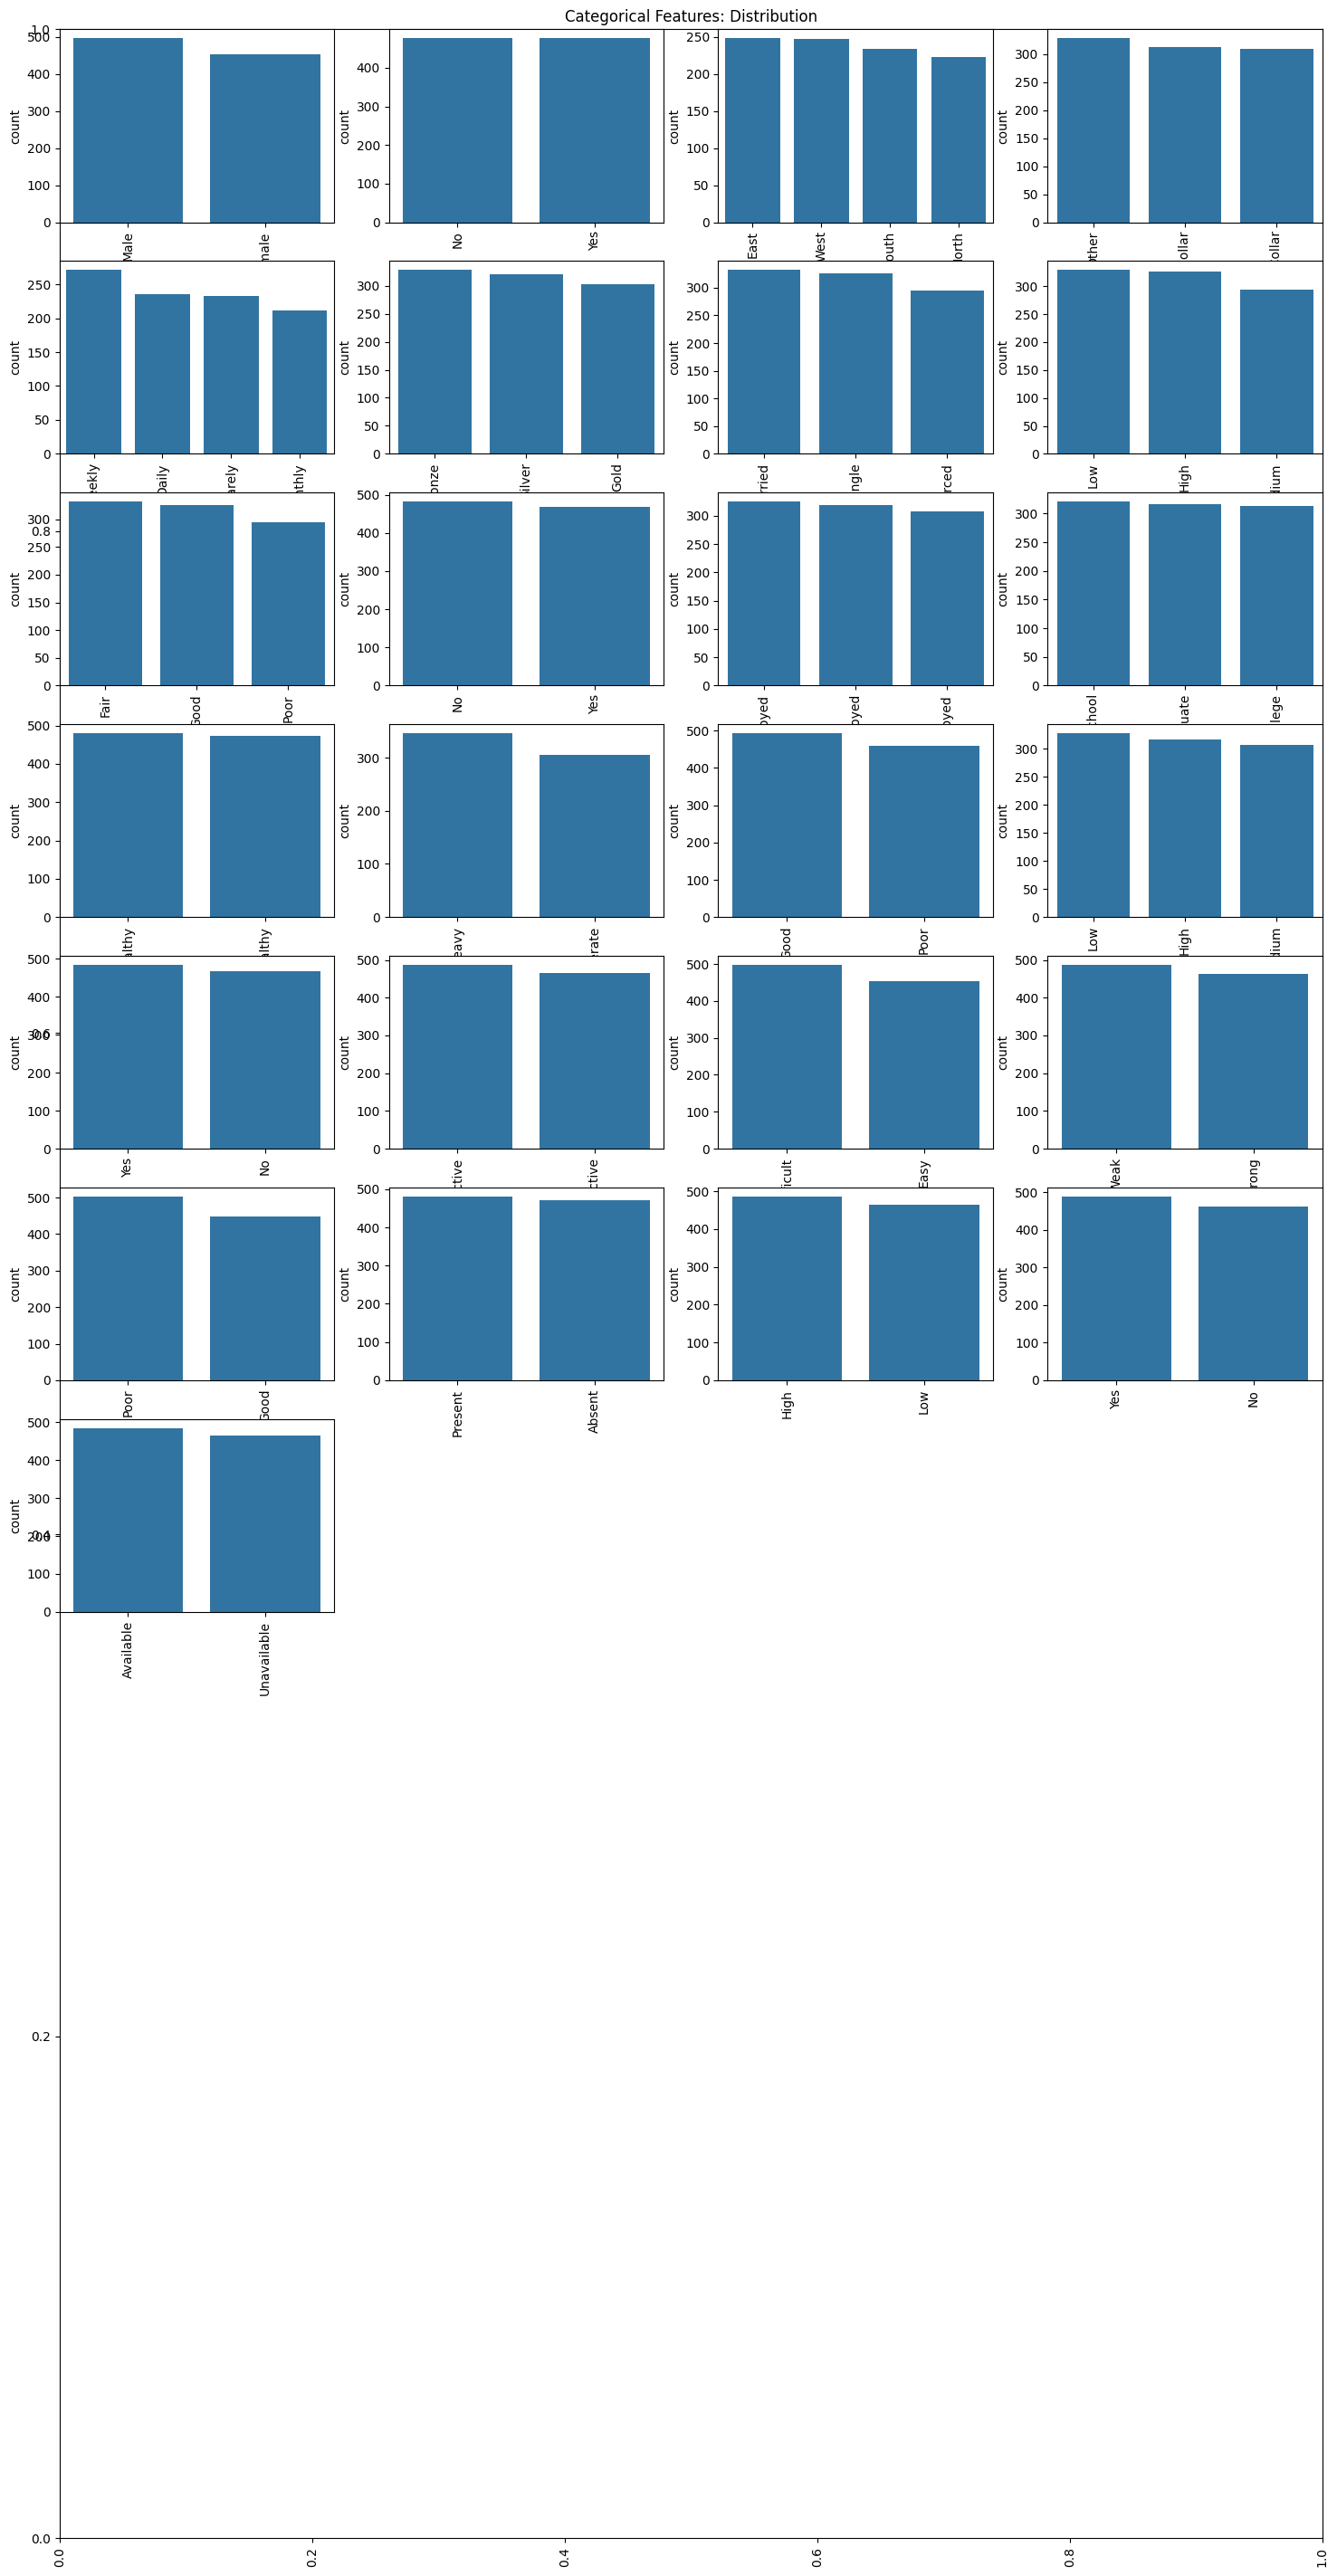

In [205]:
plt.figure(figsize=(18, 36))
plt.title('Categorical Features: Distribution')
plt.xticks(rotation=90)
index = 1

for col in object_cols:
	y = MedicalData[col].value_counts()
	plt.subplot(11, 4, index)
	plt.xticks(rotation=90)
	sns.barplot(x=list(y.index), y=y)
	index += 1

<span style="font-family: Arial; font-size: 14pt;">**Data Visualization:** </span>

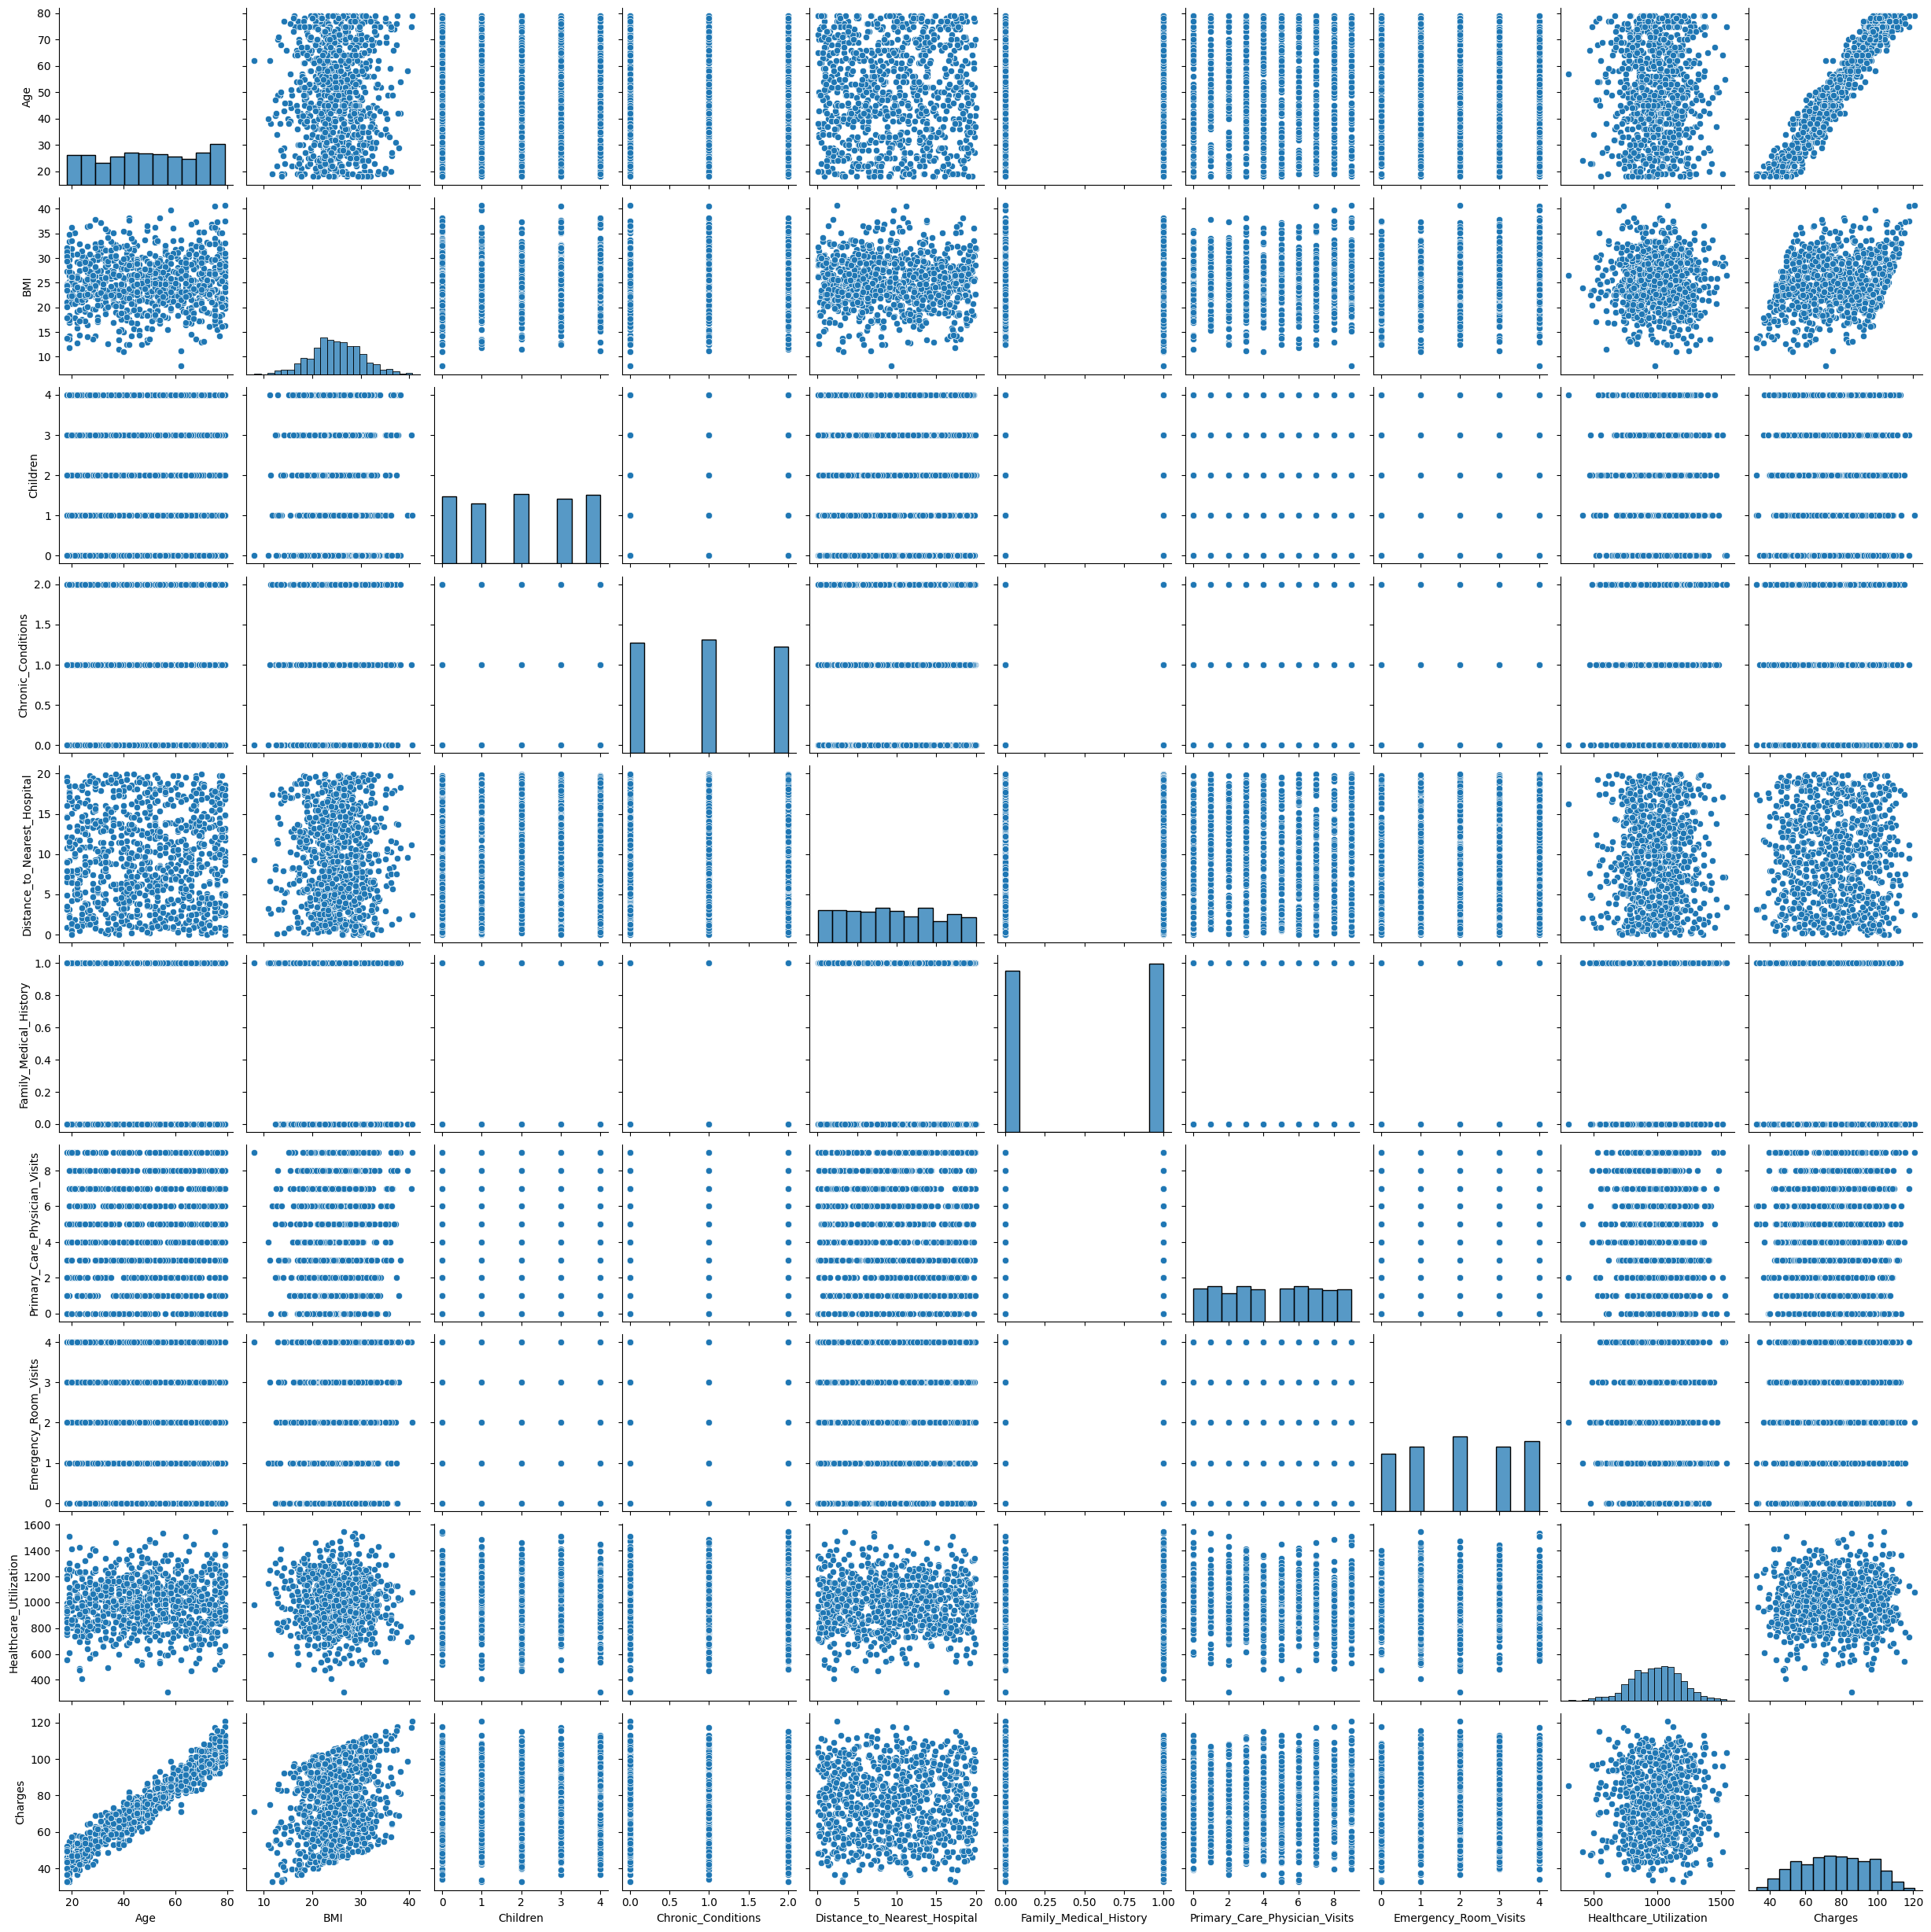

In [206]:
sns.pairplot(MedicalData)
plt.show()

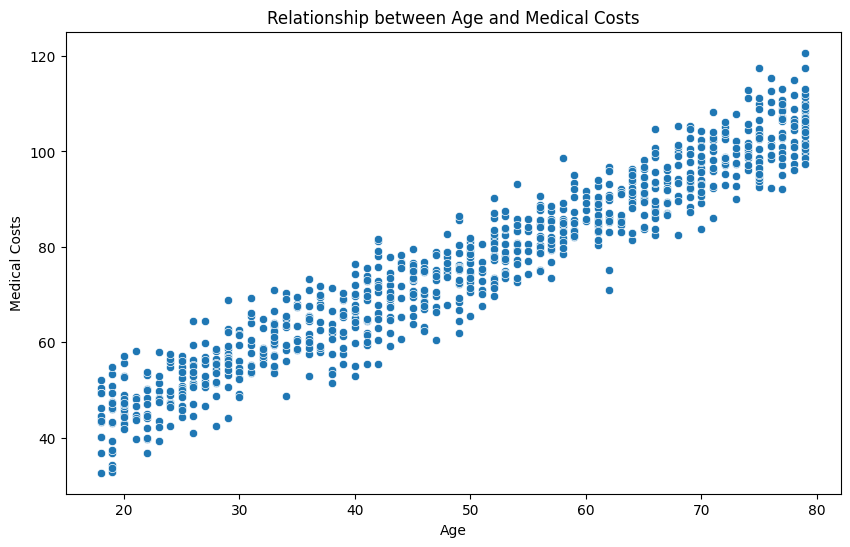

In [207]:
#Relationship between Age and Medical Costs:

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Charges', data=MedicalData)
plt.title('Relationship between Age and Medical Costs')
plt.xlabel('Age')
plt.ylabel('Medical Costs')
plt.show()

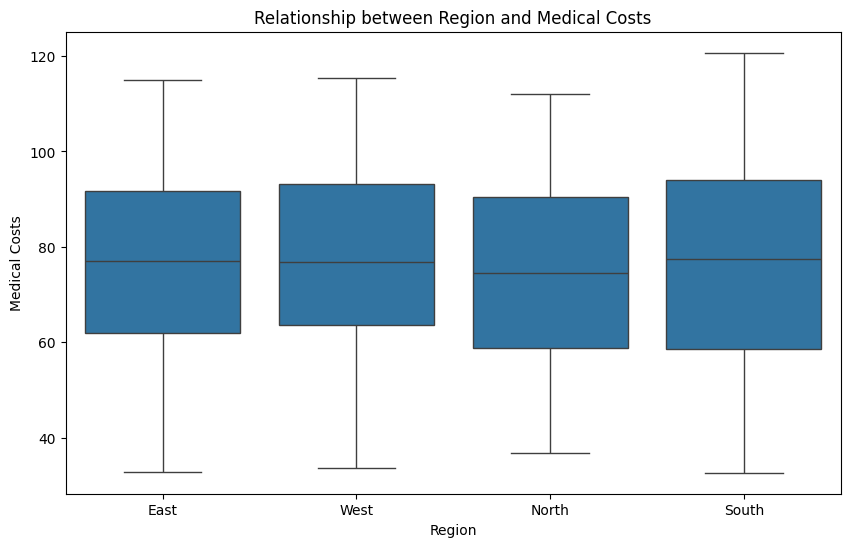

In [208]:
#Relationship between Region and Medical Costs:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Charges', data=MedicalData)
plt.title('Relationship between Region and Medical Costs')
plt.xlabel('Region')
plt.ylabel('Medical Costs')
plt.show()

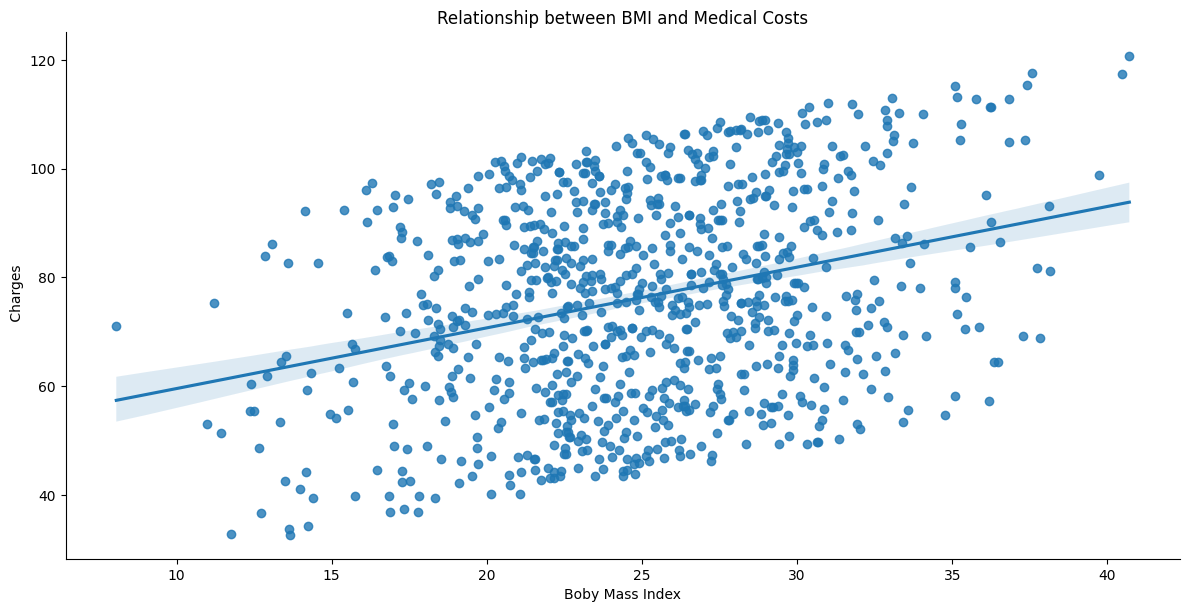

In [209]:
#Relationship between BMI and Medical Costs:

sns.lmplot(x='BMI',y='Charges',data=MedicalData,aspect=2,height=6)
plt.xlabel('Boby Mass Index')
plt.ylabel(' Charges')
plt.title('Relationship between BMI and Medical Costs');

C:\Users\mursh\AppData\Local\Temp\ipykernel_13828\1139183943.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Sex', y='Charges',data=MedicalData,palette='Wistia',ax=ax)
C:\Users\mursh\AppData\Local\Temp\ipykernel_13828\1139183943.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Smoker', y='Charges',data=MedicalData,palette='magma',ax=ax)


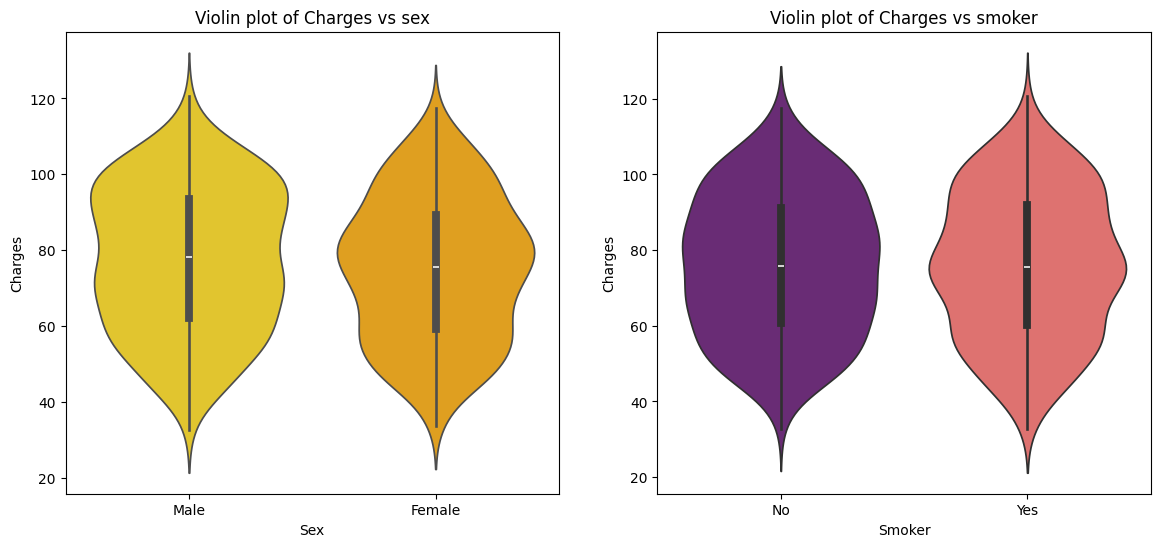

In [210]:
#Relationship between Sex and Smoking Status with Medical Costs:

f = plt.figure(figsize=(14,6))
ax = f.add_subplot(121)
sns.violinplot(x='Sex', y='Charges',data=MedicalData,palette='Wistia',ax=ax)
ax.set_title('Violin plot of Charges vs sex')

ax = f.add_subplot(122)
sns.violinplot(x='Smoker', y='Charges',data=MedicalData,palette='magma',ax=ax)
ax.set_title('Violin plot of Charges vs smoker');

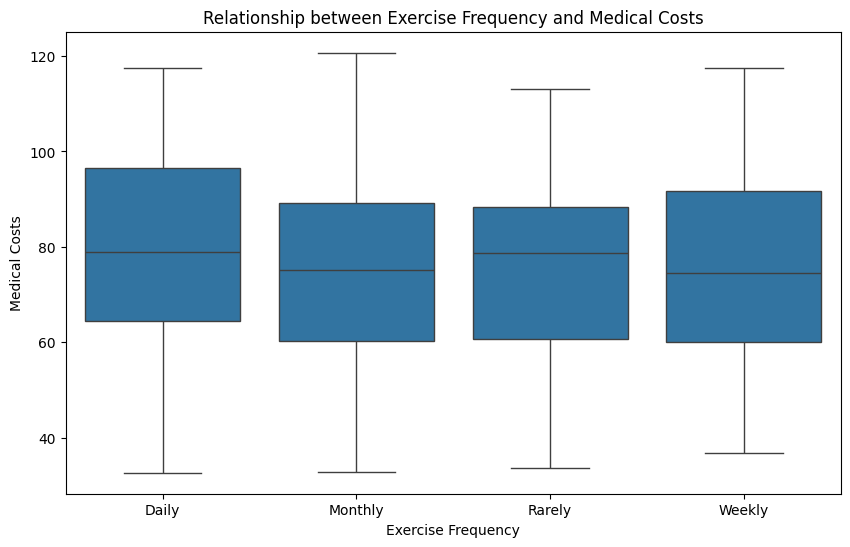

In [211]:
#Relationship between Exercise Frequency and Medical Costs:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Exercise_Frequency', y='Charges', data=MedicalData)
plt.title('Relationship between Exercise Frequency and Medical Costs')
plt.xlabel('Exercise Frequency')
plt.ylabel('Medical Costs')
plt.show()

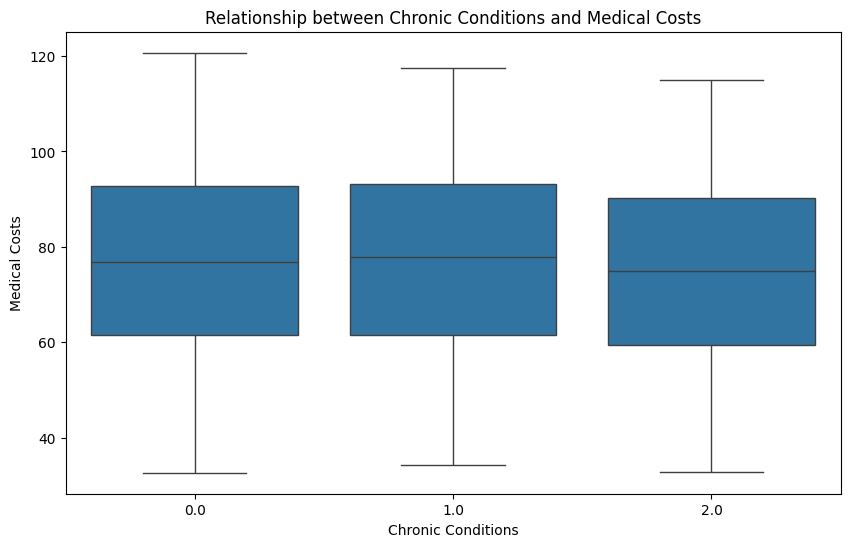

In [212]:
#Relationship between Chronic Conditions and Medical Costs:

plt.figure(figsize=(10, 6))
sns.boxplot(x='Chronic_Conditions', y='Charges', data=MedicalData)
plt.title('Relationship between Chronic Conditions and Medical Costs')
plt.xlabel('Chronic Conditions')
plt.ylabel('Medical Costs')
plt.show()

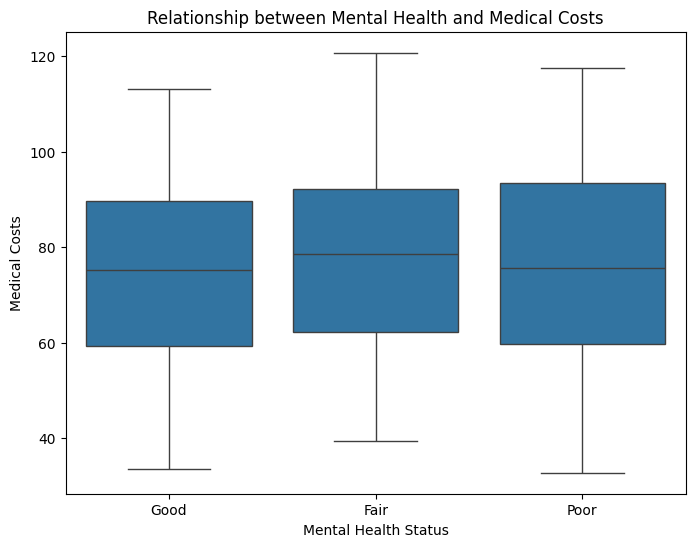

In [213]:
#Relationship between Mental Health and Medical Costs:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Mental_Health_Status', y='Charges', data=MedicalData)
plt.title('Relationship between Mental Health and Medical Costs')
plt.xlabel('Mental Health Status')
plt.ylabel('Medical Costs')
plt.show()

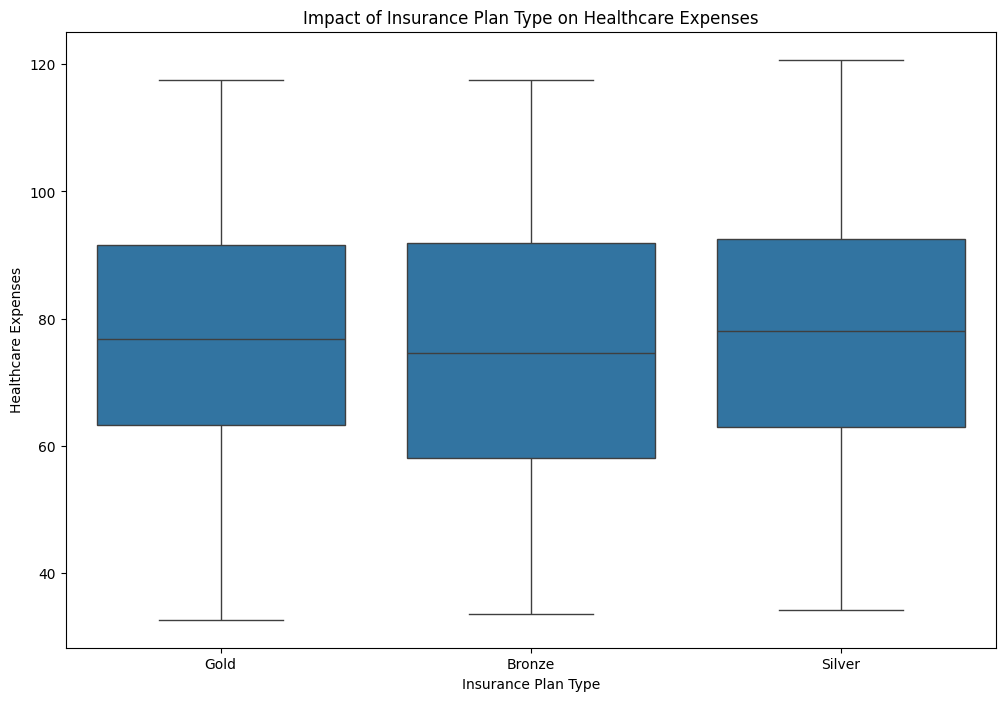

In [214]:
medical_data = MedicalData[['Insurance_Plan_Type', 'Income_Level', 'Family_Medical_History', 'Charges']]

# Data Exploration
# Visualize the relationships between features and healthcare expenses
plt.figure(figsize=(12, 8))
sns.boxplot(x='Insurance_Plan_Type', y='Charges', data=medical_data)
plt.title('Impact of Insurance Plan Type on Healthcare Expenses')
plt.xlabel('Insurance Plan Type')
plt.ylabel('Healthcare Expenses')
plt.show()


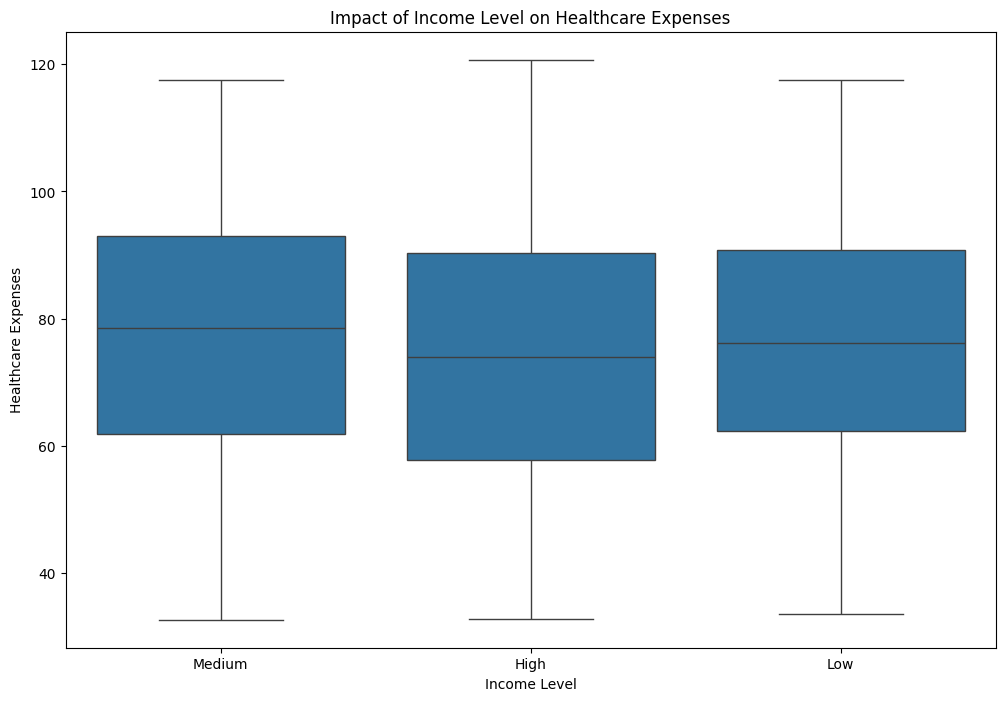

In [215]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Income_Level', y='Charges', data=medical_data)
plt.title('Impact of Income Level on Healthcare Expenses')
plt.xlabel('Income Level')
plt.ylabel('Healthcare Expenses')
plt.show()

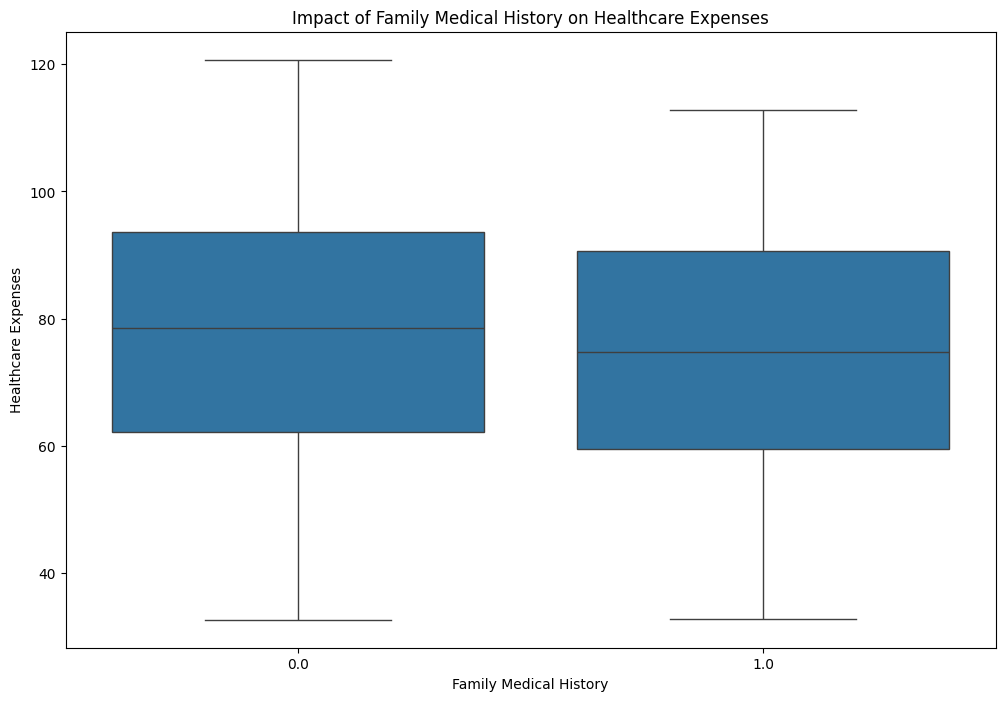

In [216]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='Family_Medical_History', y='Charges', data=medical_data)
plt.title('Impact of Family Medical History on Healthcare Expenses')
plt.xlabel('Family Medical History')
plt.ylabel('Healthcare Expenses')
plt.show()


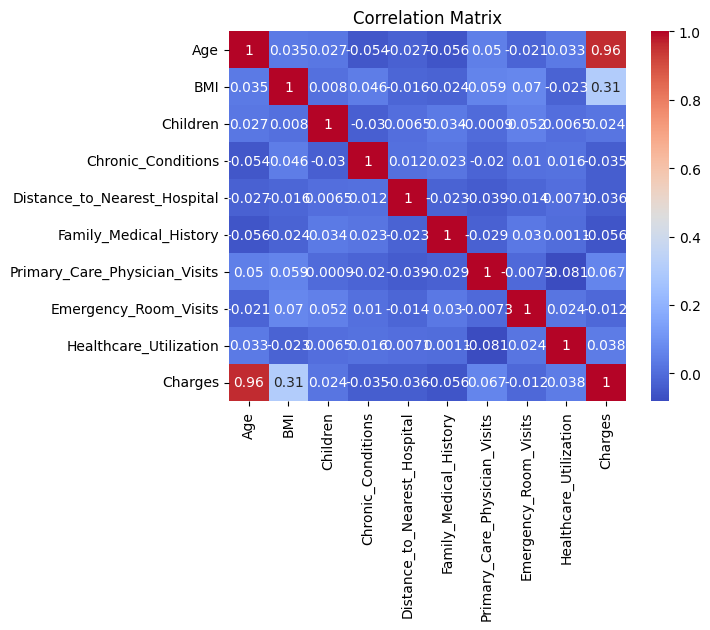

In [217]:
numerical_columns = MedicalData.select_dtypes(include=[ 'float64','int64']).columns
corr = MedicalData[numerical_columns].corr()  


sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Matrix")
plt.show()

C:\Users\mursh\AppData\Local\Temp\ipykernel_13828\2238084331.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(MedicalData['Charges'],bins=50,color='r',ax=ax)


Text(0.5, 1.0, 'Distribution of insurance charges')

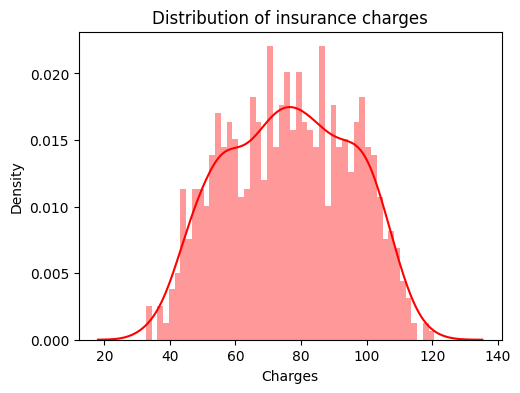

In [218]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(121)
sns.distplot(MedicalData['Charges'],bins=50,color='r',ax=ax)
ax.set_title('Distribution of insurance charges')


In [219]:
categorical_columns = MedicalData.select_dtypes(include=['object']).columns
print(categorical_columns)

Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')


In [220]:
percentage_df = pd.DataFrame(index=['Percentage of Unique Values'])

# Loop through each categorical column
for col in categorical_columns:
    # Calculate the percentage of unique values
    percentage = (MedicalData[col].value_counts() / len(MedicalData)) * 100
    # Add percentages to the DataFrame
    percentage_df[col] = percentage
    print (col,percentage)



Sex Sex
Male      49.6
Female    45.4
Name: count, dtype: float64
Smoker Smoker
No     47.6
Yes    47.6
Name: count, dtype: float64
Region Region
East     24.8
West     24.7
South    23.4
North    22.3
Name: count, dtype: float64
Occupation Occupation
Other           32.8
Blue Collar     31.3
White Collar    31.0
Name: count, dtype: float64
Exercise_Frequency Exercise_Frequency
Weekly     27.1
Daily      23.6
Rarely     23.3
Monthly    21.1
Name: count, dtype: float64
Insurance_Plan_Type Insurance_Plan_Type
Bronze    32.8
Silver    32.0
Gold      30.3
Name: count, dtype: float64
Marital_Status Marital_Status
Married     33.2
Single      32.6
Divorced    29.5
Name: count, dtype: float64
Income_Level Income_Level
Low       32.9
High      32.7
Medium    29.4
Name: count, dtype: float64
Mental_Health_Status Mental_Health_Status
Fair    33.2
Good    32.5
Poor    29.5
Name: count, dtype: float64
Prescription_Medication_Usage Prescription_Medication_Usage
No     48.2
Yes    46.9
Name: count, 

<span style="font-family: Arial; font-size: 14pt;">**Data Preprocessing:** </span>

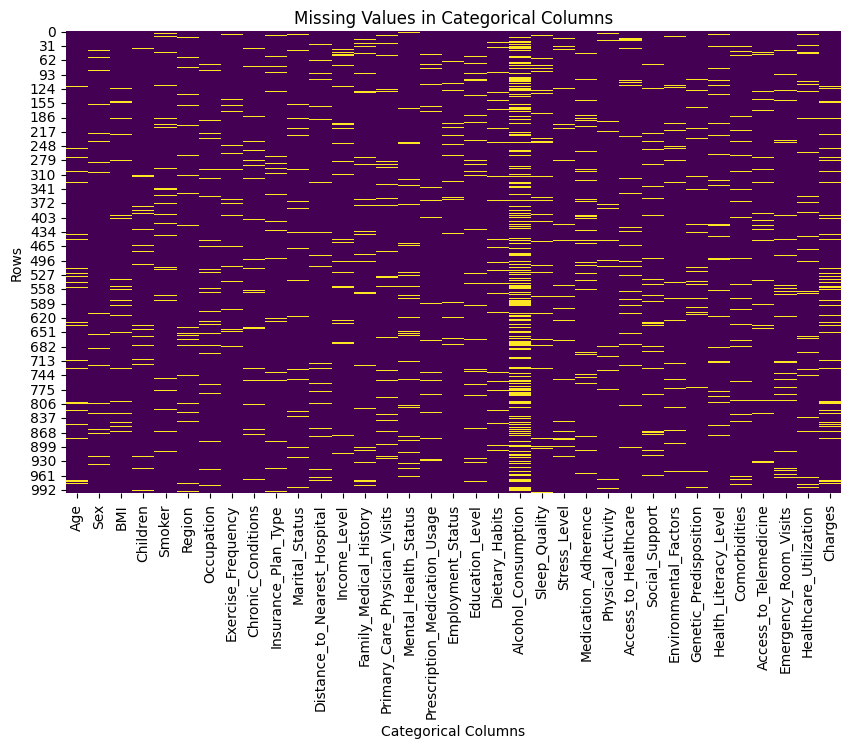

In [221]:
missing_values_indicator = MedicalData.isnull().astype(int)

# Plot the missingness heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_indicator, cmap='viridis', cbar=False)
plt.title('Missing Values in Categorical Columns')
plt.xlabel('Categorical Columns')
plt.ylabel('Rows')
plt.show()

<span style="font-family: Arial; font-size: 14pt;">**Handling Missing Values:** </span>

In [222]:
numerical_columns = MedicalData.select_dtypes(include=['float64','int64']).columns

print("Numerical columns:", numerical_columns)

Numerical columns: Index(['Age', 'BMI', 'Children', 'Chronic_Conditions',
       'Distance_to_Nearest_Hospital', 'Family_Medical_History',
       'Primary_Care_Physician_Visits', 'Emergency_Room_Visits',
       'Healthcare_Utilization', 'Charges'],
      dtype='object')


In [223]:
MedicalData[numerical_columns].isnull().sum()

Age                              50
BMI                              49
Children                         49
Chronic_Conditions               50
Distance_to_Nearest_Hospital     48
Family_Medical_History           50
Primary_Care_Physician_Visits    50
Emergency_Room_Visits            49
Healthcare_Utilization           48
Charges                          98
dtype: int64

In [224]:
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
MedicalData[numerical_columns] = mean_imputer.fit_transform(MedicalData[numerical_columns])

In [225]:
MedicalData[numerical_columns].isnull().sum()

Age                              0
BMI                              0
Children                         0
Chronic_Conditions               0
Distance_to_Nearest_Hospital     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Emergency_Room_Visits            0
Healthcare_Utilization           0
Charges                          0
dtype: int64

In [226]:
#selecting categorical columns that have null values 
Categorical_Columns = MedicalData.select_dtypes(include=['object']).columns
print (categorical_columns)
categorical_columns_withNull = MedicalData[categorical_columns].columns[MedicalData[categorical_columns].isnull().any()]
print (categorical_columns_withNull)


Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
       'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine'],
      dtype='object')
Index(['Sex', 'Smoker', 'Region', 'Occupation', 'Exercise_Frequency',
       'Insurance_Plan_Type', 'Marital_Status', 'Income_Level',
       'Mental_Health_Status', 'Prescription_Medication_Usage',
       'Employment_Status', 'Education_Level', 'Dietary_Habits',
       'Alcohol_Consumption', 'Sleep_Quality', 'Stress_Level',
       'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
       'Social_Support

In [227]:

missing_values = MedicalData[categorical_columns_withNull].isnull().sum()
print("Missing values:")
print(missing_values)

Missing values:
Sex                               50
Smoker                            48
Region                            48
Occupation                        49
Exercise_Frequency                49
Insurance_Plan_Type               49
Marital_Status                    47
Income_Level                      50
Mental_Health_Status              48
Prescription_Medication_Usage     49
Employment_Status                 48
Education_Level                   50
Dietary_Habits                    48
Alcohol_Consumption              348
Sleep_Quality                     49
Stress_Level                      48
Medication_Adherence              50
Physical_Activity                 47
Access_to_Healthcare              49
Social_Support                    50
Environmental_Factors             49
Genetic_Predisposition            47
Health_Literacy_Level             50
Comorbidities                     48
Access_to_Telemedicine            50
dtype: int64


In [228]:
def spot_missing_values(df):
    missing_values = {'NaN': 0, 'None': 0, 'nan': 0}

    for column in df.columns:
        for value in df[column]:
            if str(value).lower() == 'NaN':
                missing_values['Vacant Space'] += 1
            elif str(value).lower() == 'none':
                missing_values['None'] += 1
            elif str(value).lower() == 'nan':
                missing_values['nan'] += 1

    return missing_values

# Spot missing values in the DataFrame
missing_values_counts = spot_missing_values(MedicalData)

# Report if any missing values are found
if any(count > 0 for count in missing_values_counts.values()):
    print("Missing values spotted:")
    for value_type, count in missing_values_counts.items():
        if count > 0:
            print(f"{value_type}: {count}")
else:
    print("No missing values spotted.")

Missing values spotted:
nan: 1518


In [229]:
# Replace 'nan' strings with actual NaN values
MedicalData.replace('nan', pd.NA, inplace=True)

# Replace NaN values with the mode of each column
for column in MedicalData.columns:
    mode_value = MedicalData[column].mode()[0]  # Calculate the mode of the column
    MedicalData[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode

MedicalData = MedicalData.fillna(method='ffill')

# Replacing occurrences of "None" with forward fill
for column in MedicalData.columns:
    MedicalData[column] = MedicalData[column].replace('None', method='ffill')


C:\Users\mursh\AppData\Local\Temp\ipykernel_13828\4053941342.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  MedicalData[column].fillna(mode_value, inplace=True)  # Fill NaN values with the mode
C:\Users\mursh\AppData\Local\Temp\ipykernel_13828\4053941342.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  MedicalData = MedicalData.fillna(method='ffill')
C:\Users\mursh\AppData\Local\Temp\ipykernel_13828\4053941342.py:13: FutureWarni

In [230]:
print(MedicalData.isnull().sum()) 

Age                              0
Sex                              0
BMI                              0
Children                         0
Smoker                           0
Region                           0
Occupation                       0
Exercise_Frequency               0
Chronic_Conditions               0
Insurance_Plan_Type              0
Marital_Status                   0
Distance_to_Nearest_Hospital     0
Income_Level                     0
Family_Medical_History           0
Primary_Care_Physician_Visits    0
Mental_Health_Status             0
Prescription_Medication_Usage    0
Employment_Status                0
Education_Level                  0
Dietary_Habits                   0
Alcohol_Consumption              0
Sleep_Quality                    0
Stress_Level                     0
Medication_Adherence             0
Physical_Activity                0
Access_to_Healthcare             0
Social_Support                   0
Environmental_Factors            0
Genetic_Predispositi

<span style="font-family: Arial; font-size: 14pt;">**Data Cleaning:** </span>

In [231]:
# Select numerical columns excluding 'Charges'
numerical_columns = MedicalData.select_dtypes(include=['float64', 'int64']).columns


Q1 = MedicalData[numerical_columns].quantile(0.25)
Q3 = MedicalData[numerical_columns].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Identify outliers
outliers = (MedicalData[numerical_columns] < lower_bound) | (MedicalData[numerical_columns]> upper_bound)


# Count the number of outliers in each feature
num_outliers = outliers.sum()

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(num_outliers)

Number of outliers for each feature:
Age                               0
BMI                              11
Children                          0
Chronic_Conditions                0
Distance_to_Nearest_Hospital      0
Family_Medical_History            0
Primary_Care_Physician_Visits     0
Emergency_Room_Visits             0
Healthcare_Utilization           10
Charges                           0
dtype: int64


In [232]:


# Function to replace outliers with median
def replace_outliers_with_median(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    column = column.mask((column < lower_bound) | (column > upper_bound), column.median())
    return column

# Loop through numerical columns and replace outliers with median
for column in numerical_columns:
    MedicalData[column] = replace_outliers_with_median(MedicalData[column])

# Print the DataFrame with replaced outliers
print(MedicalData)

      Age     Sex        BMI  Children Smoker Region    Occupation  \
0    56.0    Male  26.787630       0.0     No   East  White Collar   
1    69.0    Male  22.063650       4.0    Yes   West  White Collar   
2    46.0  Female  24.036100       2.0    Yes   East  White Collar   
3    32.0    Male  24.229820       2.0     No  North   Blue Collar   
4    60.0    Male  31.784280       0.0     No   East   Blue Collar   
..    ...     ...        ...       ...    ...    ...           ...   
995  18.0    Male  17.794340       0.0    Yes   West         Other   
996  35.0  Female  22.538240       1.0    Yes   East         Other   
997  49.0    Male  18.285480       4.0     No  South         Other   
998  64.0    Male  22.096110       2.0     No   West  White Collar   
999  66.0  Female  24.951876       2.0     No  South   Blue Collar   

    Exercise_Frequency  Chronic_Conditions Insurance_Plan_Type  ...  \
0                Daily                 2.0                Gold  ...   
1              Mo

<span style="font-family: Arial; font-size: 14pt;">**Feature Engineering:** </span>

<span style="font-family: Arial; font-size: 12pt;">**Encoding categorical variables:** </span>

In [233]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [234]:
#Encoding categorical variables

nominal_columns = ['Sex', 'Smoker', 'Region', 'Occupation', 'Insurance_Plan_Type',
                             'Marital_Status', 'Mental_Health_Status', 'Prescription_Medication_Usage',
                             'Employment_Status', 'Dietary_Habits', 'Alcohol_Consumption', 'Sleep_Quality',
                             'Stress_Level', 'Medication_Adherence', 'Physical_Activity', 'Access_to_Healthcare',
                             'Social_Support', 'Environmental_Factors', 'Genetic_Predisposition',
                             'Health_Literacy_Level', 'Comorbidities', 'Access_to_Telemedicine']


# One-hot encoding for nominal columns
nominal_columns_encoded = pd.get_dummies(MedicalData[nominal_columns],dtype=int)
nominal_columns_encoded

,Sex_Female,Sex_Male,Smoker_No,Smoker_Yes,Region_East,Region_North,Region_South,Region_West,Occupation_Blue Collar,Occupation_Other,...,Environmental_Factors_Good,Environmental_Factors_Poor,Genetic_Predisposition_Absent,Genetic_Predisposition_Present,Health_Literacy_Level_High,Health_Literacy_Level_Low,Comorbidities_No,Comorbidities_Yes,Access_to_Telemedicine_Available,Access_to_Telemedicine_Unavailable
0,0,1,1,0,1,0,0,0,0,0,...,1,0,0,1,1,0,0,1,0,1
1,0,1,0,1,0,0,0,1,0,0,...,1,0,1,0,1,0,0,1,1,0
2,1,0,0,1,1,0,0,0,0,0,...,1,0,1,0,0,1,1,0,0,1
3,0,1,1,0,0,1,0,0,1,0,...,1,0,0,1,0,1,1,0,1,0
4,0,1,1,0,1,0,0,0,1,0,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,0,1,0,0,0,1,0,1,...,1,0,1,0,0,1,0,1,0,1
996,1,0,0,1,1,0,0,0,0,1,...,1,0,1,0,0,1,0,1,0,1
997,0,1,1,0,0,0,1,0,0,1,...,0,1,0,1,1,0,1,0,0,1
998,0,1,1,0,0,0,0,1,0,0,...,1,0,0,1,1,0,0,1,0,1


In [235]:
ordinal_columns= ['Exercise_Frequency', 'Income_Level', 'Education_Level']
# Label encoding for ordinal columns
ordinal_columns_encoded = MedicalData[ordinal_columns].copy()
for column in ordinal_columns_encoded.columns:
    label_encoder = LabelEncoder()
    ordinal_columns_encoded[column] = label_encoder.fit_transform(ordinal_columns_encoded[column])
ordinal_columns_encoded

,Exercise_Frequency,Income_Level,Education_Level
0,0,2,1
1,1,0,1
2,2,2,0
3,2,0,1
4,3,1,0
...,...,...,...
995,1,0,1
996,1,1,1
997,1,2,1
998,2,1,1


In [236]:
# Replace original columns with encoded columns
MedicalData_encoded = pd.concat([nominal_columns_encoded, ordinal_columns_encoded], axis=1)


# Concatenate encoded columns with remaining columns
MedicalData = pd.concat([MedicalData.drop(columns=categorical_columns), MedicalData_encoded], axis=1)
MedicalData.head

<bound method NDFrame.head of       Age        BMI  Children  Chronic_Conditions  \
0    56.0  26.787630       0.0                 2.0   
1    69.0  22.063650       4.0                 2.0   
2    46.0  24.036100       2.0                 1.0   
3    32.0  24.229820       2.0                 2.0   
4    60.0  31.784280       0.0                 0.0   
..    ...        ...       ...                 ...   
995  18.0  17.794340       0.0                 1.0   
996  35.0  22.538240       1.0                 1.0   
997  49.0  18.285480       4.0                 2.0   
998  64.0  22.096110       2.0                 0.0   
999  66.0  24.951876       2.0                 1.0   

     Distance_to_Nearest_Hospital  Family_Medical_History  \
0                       12.233110                     0.0   
1                       11.314950                     0.0   
2                       14.294050                     1.0   
3                       18.754090                     0.0   
4               

In [237]:
from scipy.stats import skew
for col in numerical_columns:
    print (col)
    print (skew(MedicalData[col]))

Age
-0.06739220000017952
BMI
0.009954199737813932
Children
-0.030898670862274477
Chronic_Conditions
0.023628008582411677
Distance_to_Nearest_Hospital
0.10013236512600979
Family_Medical_History
-0.04320866489746262
Primary_Care_Physician_Visits
-0.005089375073107391
Emergency_Room_Visits
-0.05649487083737604
Healthcare_Utilization
-0.029781709620251354
Charges
-0.04497913360836878


In [238]:
MedicalData[numerical_columns]=np.sqrt(MedicalData[numerical_columns])

In [239]:
MedicalData.corr()

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Charges,...,Genetic_Predisposition_Present,Health_Literacy_Level_High,Health_Literacy_Level_Low,Comorbidities_No,Comorbidities_Yes,Access_to_Telemedicine_Available,Access_to_Telemedicine_Unavailable,Exercise_Frequency,Income_Level,Education_Level
Age,1.000000,0.022191,0.016108,-0.045673,-0.031128,-0.050643,0.030192,-0.018700,0.025396,0.935240,...,-0.026129,-0.020169,0.020169,0.019052,-0.019052,0.041516,-0.041516,-0.049362,0.060481,-0.014565
BMI,0.022191,1.000000,-0.007257,0.037287,-0.023547,-0.001973,0.038518,0.065693,-0.028625,0.279265,...,-0.036413,0.002112,-0.002112,0.010686,-0.010686,-0.025983,0.025983,-0.028808,0.005136,0.011065
Children,0.016108,-0.007257,1.000000,-0.021593,-0.002604,0.028742,-0.014621,0.012601,0.004556,0.008941,...,-0.017813,-0.013243,0.013243,0.039760,-0.039760,0.007439,-0.007439,-0.020885,-0.029469,-0.007006
Chronic_Conditions,-0.045673,0.037287,-0.021593,1.000000,0.000431,0.031431,-0.015431,0.003724,0.009617,-0.025056,...,-0.011824,0.025337,-0.025337,-0.012636,0.012636,-0.070828,0.070828,0.022251,-0.044125,0.004318
Distance_to_Nearest_Hospital,-0.031128,-0.023547,-0.002604,0.000431,1.000000,-0.018353,-0.044379,-0.014899,0.006433,-0.039548,...,-0.040693,0.011433,-0.011433,0.009420,-0.009420,0.031860,-0.031860,0.056616,-0.011663,-0.003971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Access_to_Telemedicine_Available,0.041516,-0.025983,0.007439,-0.070828,0.031860,-0.010580,-0.002832,-0.048868,0.011752,0.030941,...,-0.054138,0.037147,-0.037147,-0.059127,0.059127,1.000000,-1.000000,-0.022134,-0.064539,-0.031665
Access_to_Telemedicine_Unavailable,-0.041516,0.025983,-0.007439,0.070828,-0.031860,0.010580,0.002832,0.048868,-0.011752,-0.030941,...,0.054138,-0.037147,0.037147,0.059127,-0.059127,-1.000000,1.000000,0.022134,0.064539,0.031665
Exercise_Frequency,-0.049362,-0.028808,-0.020885,0.022251,0.056616,0.036316,0.006338,0.018816,-0.001447,-0.052774,...,0.004604,0.032125,-0.032125,-0.005072,0.005072,-0.022134,0.022134,1.000000,0.014269,-0.043869
Income_Level,0.060481,0.005136,-0.029469,-0.044125,-0.011663,-0.012871,-0.018251,0.000463,0.020732,0.056020,...,-0.029451,0.006846,-0.006846,0.018541,-0.018541,-0.064539,0.064539,0.014269,1.000000,-0.063252


<span style="font-family: Arial; font-size: 12pt;">**Scaling numerical features:** </span>

In [240]:
# Split features and target variable
X = MedicalData.drop(['Charges'], axis=1)
Y = MedicalData['Charges']
print (X)
print (Y)

          Age       BMI  Children  Chronic_Conditions  \
0    7.483315  5.175677  0.000000            1.414214   
1    8.306624  4.697196  2.000000            1.414214   
2    6.782330  4.902663  1.414214            1.000000   
3    5.656854  4.922380  1.414214            1.414214   
4    7.745967  5.637755  0.000000            0.000000   
..        ...       ...       ...                 ...   
995  4.242641  4.218334  0.000000            1.000000   
996  5.916080  4.747446  1.000000            1.000000   
997  7.000000  4.276152  2.000000            1.414214   
998  8.000000  4.700650  1.414214            0.000000   
999  8.124038  4.995185  1.414214            1.000000   

     Distance_to_Nearest_Hospital  Family_Medical_History  \
0                        3.497586                     0.0   
1                        3.363770                     0.0   
2                        3.780747                     1.0   
3                        4.330599                     0.0   
4         

In [241]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()  # Initialize StandardScaler
scaler.fit(X)
X[:]=scaler.transform(X)

C:\Users\mursh\AppData\Local\Temp\ipykernel_13828\2840681843.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.         0.33333333 0.66666667 0.66666667 1.         1.
 1.         1.         0.33333333 1.         1.         0.66666667
 0.66666667 0.         0.         0.66666667 1.         1.
 0.         0.         0.         0.33333333 0.33333333 1.
 1.         0.         0.33333333 1.         0.33333333 1.
 0.33333333 1.         1.         1.         1.         0.66666667
 0.33333333 0.33333333 0.66666667 1.         1.         0.33333333
 0.66666667 1.         1.         1.         0.         0.66666667
 1.         0.         0.66666667 1.         0.33333333 0.
 0.         1.         1.         0.         0.33333333 0.33333333
 0.66666667 1.         0.33333333 0.66666667 0.33333333 1.
 0.66666667 0.66666667 0.66666667 0.33333333 1.         0.66666667
 0.         1.         0.         0.         0.66666667 0.6

In [242]:
X

,Age,BMI,Children,Chronic_Conditions,Distance_to_Nearest_Hospital,Family_Medical_History,Primary_Care_Physician_Visits,Emergency_Room_Visits,Healthcare_Utilization,Sex_Female,...,Genetic_Predisposition_Present,Health_Literacy_Level_High,Health_Literacy_Level_Low,Comorbidities_No,Comorbidities_Yes,Access_to_Telemedicine_Available,Access_to_Telemedicine_Unavailable,Exercise_Frequency,Income_Level,Education_Level
0,0.697586,0.632309,0.000000,1.000000,0.779067,0.0,0.816497,1.000000,0.551074,0,...,1,1,0,0,1,0,1,0.000000,1.0,0.5
1,0.874811,0.450156,1.000000,1.000000,0.748654,0.0,0.471405,0.707107,0.621176,0,...,0,1,0,0,1,1,0,0.333333,0.0,0.5
2,0.546692,0.528375,0.707107,0.707107,0.843422,1.0,1.000000,0.707107,0.408684,1,...,0,0,1,1,0,0,1,0.666667,1.0,0.0
3,0.304423,0.535881,0.707107,1.000000,0.968389,0.0,0.471405,0.000000,0.502702,0,...,1,0,1,1,0,1,0,0.666667,0.0,0.5
4,0.754125,0.808219,0.000000,0.000000,0.954941,1.0,0.471405,0.707107,0.814161,0,...,1,0,1,0,1,1,0,1.000000,0.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.000000,0.267857,0.000000,0.707107,0.408144,0.0,0.471405,0.707107,0.507902,0,...,0,0,1,0,1,0,1,0.333333,0.0,0.5
996,0.360224,0.469285,0.500000,0.707107,0.870677,1.0,0.471405,1.000000,0.830944,1,...,0,0,1,0,1,0,1,0.333333,0.5,0.5
997,0.593548,0.289868,1.000000,1.000000,0.112071,0.0,0.577350,0.500000,0.878960,0,...,1,1,0,1,0,0,1,0.333333,1.0,0.5
998,0.808808,0.451471,0.707107,0.000000,0.743272,1.0,0.942809,0.000000,0.346842,0,...,1,1,0,0,1,0,1,0.666667,0.5,0.5


In [243]:
# Split the data into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [276]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)
Y_pred= model.predict(X_test)

In [277]:
Y_test[:10]

521     9.008111
737     8.780923
740    10.433863
660     6.821452
411    10.300976
678     8.544575
626     9.907013
513     8.734567
859     9.482301
136     7.048618
Name: Charges, dtype: float64

In [278]:
Y_pred[:10]

array([ 8.2890625,  8.765625 , 10.1875   ,  6.9296875, 10.2109375,
        8.515625 ,  9.7890625,  8.7421875,  9.328125 ,  6.859375 ])

In [279]:
# Calculate evaluation metrics
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(mae)
print(mse)
print(r2)

0.12209666351268017
0.03911700492156065
0.9651795442782871


<span style="font-family: Arial; font-size: 14pt;">**Feature Selection:** </span>

In [247]:
#using Recurssive feature elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Define the estimator (model)
estimator = LinearRegression()

# Initialize RFE with the estimator and number of features to select
rfe = RFE(estimator, n_features_to_select=5)

# Fit RFE to the data
rfe.fit(X_train, Y_train)

# Get the selected features
selected_features_rfe = X_train.columns[rfe.support_]
selected_features_rfe

Index(['Mental_Health_Status_Fair', 'Mental_Health_Status_Good',
       'Mental_Health_Status_Poor', 'Comorbidities_No', 'Comorbidities_Yes'],
      dtype='object')

In [248]:
# Fit a Random Forest model to get feature importances
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, Y_train)


feature_importances = rf.feature_importances_

selected_features_rf = X_train.columns[feature_importances.argsort()[-5:][::-1]]
selected_features_rf

Index(['Age', 'BMI', 'Distance_to_Nearest_Hospital', 'Healthcare_Utilization',
       'Primary_Care_Physician_Visits'],
      dtype='object')

In [249]:
#SelectKBest with ANOVA F-value:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)

selector.fit(X_train, Y_train)

selected_features_anova = X_train.columns[selector.get_support()]
selected_features_anova


Index(['Age', 'BMI', 'Distance_to_Nearest_Hospital',
       'Insurance_Plan_Type_Bronze', 'Mental_Health_Status_Fair'],
      dtype='object')

In [250]:
#Lasso Regression for Feature Selection:
from sklearn.linear_model import Lasso


lasso = Lasso(alpha=0.1)
lasso.fit(X_train, Y_train)

selected_features_lasso = X_train.columns[lasso.coef_ != 0]
selected_features_lasso


Index(['Age'], dtype='object')

<span style="font-family: Arial; font-size: 14pt;">**Model Selection , Training and Evaluation:** </span>

In [251]:
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [252]:
# Define SVR model
svr_model = SVR()


# Train model
svr_model.fit(X_train[selected_features_rf], Y_train)

# Predict
svr_predictions = svr_model.predict(X_test[selected_features_rf])


In [253]:
# Calculate evaluation metrics for SVR
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)

print(svr_mae)
print(svr_mse)
print(svr_r2)



0.11226591073224158
0.04108949994148125
0.9634237049536718


In [254]:
# Train model
svr_model.fit(X_train[selected_features_anova], Y_train)
# Predict
svr_predictions = svr_model.predict(X_test[selected_features_anova])

In [255]:
# Calculate evaluation metrics for SVR
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)

print(svr_mae)
print(svr_mse)
print(svr_r2)


0.10077691344131416
0.03428496585732042
0.9694808399071154


In [256]:
# Train model
svr_model.fit(X_train[selected_features_lasso], Y_train)

# Predict
svr_predictions = svr_model.predict(X_test[selected_features_lasso])

In [257]:
# Calculate evaluation metrics for SVR
svr_mae = mean_absolute_error(Y_test, svr_predictions)
svr_mse = mean_squared_error(Y_test, svr_predictions)
svr_r2 = r2_score(Y_test, svr_predictions)

print(svr_mae)
print(svr_mse)
print(svr_r2)

0.22799753443800913
0.09896990910640419
0.9119007872731579


In [258]:
# Define MLP model
mlp_model = MLPRegressor()

# Train models
mlp_model.fit(X_train[selected_features_rf], Y_train)

# Predict
mlp_predictions = mlp_model.predict(X_test[selected_features_rf])


C:\Users\mursh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [259]:
# Calculate evaluation metrics for MLP
mlp_mae = mean_absolute_error(Y_test, mlp_predictions)
mlp_mse = mean_squared_error(Y_test, mlp_predictions)
mlp_r2 = r2_score(Y_test, mlp_predictions)

print(mlp_mae)
print(mlp_mse)
print(mlp_r2)


0.3537062326545717
0.20218205388669042
0.8200252992476398


In [260]:

# Train models
mlp_model.fit(X_train[selected_features_anova], Y_train)

# Predict
mlp_predictions = mlp_model.predict(X_test[selected_features_anova])


C:\Users\mursh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [261]:
# Calculate evaluation metrics for MLP
mlp_mae = mean_absolute_error(Y_test, mlp_predictions)
mlp_mse = mean_squared_error(Y_test, mlp_predictions)
mlp_r2 = r2_score(Y_test, mlp_predictions)

print(mlp_mae)
print(mlp_mse)
print(mlp_r2)

0.30099940152248356
0.13825139231562805
0.8769339192955925


In [262]:
# Train model
mlp_model.fit(X_train[selected_features_lasso], Y_train)

# Predict
mlp_predictions = mlp_model.predict(X_test[selected_features_lasso])

C:\Users\mursh\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [263]:
# Calculate evaluation metrics for MLP
mlp_mae = mean_absolute_error(Y_test, mlp_predictions)
mlp_mse = mean_squared_error(Y_test, mlp_predictions)
mlp_r2 = r2_score(Y_test, mlp_predictions)

print(mlp_mae)
print(mlp_mse)
print(mlp_r2)

0.3369139357206778
0.20122337529083448
0.8208786781212343


In [264]:
# Define Random Forest model
rf_model = RandomForestRegressor()

# Train models
rf_model.fit(X_train[selected_features_rf], Y_train)

# Predict
rf_predictions = rf_model.predict(X_test[selected_features_rf])


In [265]:
# Calculate evaluation metrics for Random Forest
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

print(rf_mae)
print(rf_mse)
print(rf_r2)

0.06974746290831618
0.01858729630045232
0.9834543025695834


In [266]:
# Train models
rf_model.fit(X_train[selected_features_anova], Y_train)

# Predict
rf_predictions = rf_model.predict(X_test[selected_features_anova])


In [267]:
# Calculate evaluation metrics for Random Forest
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

print(rf_mae)
print(rf_mse)
print(rf_r2)

0.06859309786074316
0.02102409422280136
0.9812851586300598


In [268]:
# Train model
rf_model.fit(X_train[selected_features_lasso], Y_train)

# Predict
rf_predictions = rf_model.predict(X_test[selected_features_lasso])

In [269]:
# Calculate evaluation metrics for Random Forest
rf_mae = mean_absolute_error(Y_test, rf_predictions)
rf_mse = mean_squared_error(Y_test, rf_predictions)
rf_r2 = r2_score(Y_test, rf_predictions)

print(rf_mae)
print(rf_mse)
print(rf_r2)

0.24732249390746516
0.11655814494438388
0.896244415103369


In [270]:
# Define Linear Regression model
lr_model = LinearRegression()

# Train models
lr_model.fit(X_train[selected_features_rf], Y_train)


# Predict
lr_predictions = lr_model.predict(X_test[selected_features_rf])


In [271]:
# Calculate evaluation metrics for Linear Regression
lr_mae = mean_absolute_error(Y_test,lr_predictions)
lr_mse = mean_squared_error(Y_test,lr_predictions)
lr_r2 = r2_score(Y_test,lr_predictions)

print(lr_mae)
print(lr_mse)
print(lr_r2)

0.10185993504186663
0.032229772969875524
0.9713102936978735


In [272]:
# Train models
lr_model.fit(X_train[selected_features_anova], Y_train)

# Predict
lr_predictions = lr_model.predict(X_test[selected_features_anova])


In [273]:
# Calculate evaluation metrics for Linear Regression
lr_mae = mean_absolute_error(Y_test,lr_predictions)
lr_mse = mean_squared_error(Y_test,lr_predictions)
lr_r2 = r2_score(Y_test,lr_predictions)

print(lr_mae)
print(lr_mse)
print(lr_r2)

0.10766206973393402
0.03369689062532725
0.9700043218970509


In [274]:
# Train model
lr_model.fit(X_train[selected_features_lasso], Y_train)

# Predict
lr_predictions = lr_model.predict(X_test[selected_features_lasso])

In [275]:
# Calculate evaluation metrics for Linear Regression
lr_mae = mean_absolute_error(Y_test,lr_predictions)
lr_mse = mean_squared_error(Y_test,lr_predictions)
lr_r2 = r2_score(Y_test,lr_predictions)

print(lr_mae)
print(lr_mse)
print(lr_r2)


0.23203520409120734
0.10047475995510304
0.910561226832629


<span style="font-family: Arial; font-size: 14pt;">**Interpretation of Results:** </span>

<span style="font-family: Arial; font-size: 11pt;">**High Correlation:**
The strong correlation of 0.96 between 'Age' and 'Charges' indicates that age has a significant impact on medical insurance charges. Similarly, the moderate correlation of 0.31 between 'BMI' and 'Charges' suggests that BMI also plays a role in determining insurance costs.


**Feature Importance:**
The feature selection techniques (Random forest regressor, SelectKBest, Lasso Regression) and various models (SVR, MLP Regressor, Linear Regression, Random Forest Regressor) consistently achieved high R2 scores ranging from 0.75 to 0.98. This indicates that the selected features are highly predictive of medical insurance costs.
 </span>

<span style="font-family: Arial; font-size: 14pt;">**Limitations of Dataset/Model:** </span>

<span style="font-family: Arial; font-size: 11pt;">**Missing Values:**
The dataset contains missing values in all columns, including the target variable ('Charges'). Imputation of missing values may introduce bias into the analysis, especially if the missingness is not random.

**Imputation Techniques:** Imputing missing values with mean for numerical variables and mode for categorical variables may not capture the true underlying distributions of the data, potentially leading to inaccurate predictions.

**Outliers Handling:** While replacing outliers with the median can mitigate their impact on the analysis, it may also affect the variability and distribution of the data, potentially influencing the performance of the models.

**Limited Correlation:** Apart from 'Age' and 'BMI', other columns have low correlations with 'Charges'. This suggests that the dataset may not fully capture all factors influencing medical insurance costs, leading to potential underfitting of the models.

</span>

<span style="font-family: Arial; font-size: 14pt;">**Future Work:** </span>

<span style="font-family: Arial; font-size: 11pt;">**Improved Data Collection:** 
Collect more comprehensive data that includes additional variables such as pre-existing conditions, lifestyle factors, and specific medical procedures. This can provide a more holistic view of the factors influencing medical insurance costs.

**Advanced Imputation Techniques:**
 Explore advanced imputation techniques such as KNN imputation or iterative imputation to better handle missing values and preserve the underlying distributions of the data.

**Outliers Analysis:**
Conduct a more in-depth analysis of outliers to understand their underlying causes and determine whether they should be treated differently or excluded from the analysis altogether.

**Model Interpretability:**
Focus on improving the interpretability of the models to gain insights into the factors driving medical insurance costs. Techniques such as SHAP (SHapley Additive exPlanations) values or partial dependence plots can help explain the model predictions.

**Cross-Validation and Model Evaluation:** 
Perform robust cross-validation and model evaluation to ensure the stability and generalization of the models across different subsets of the data. This can help assess the robustness of the model performance and identify potential sources of variability.
 </span>